# Ford GoBike System Presentation 

## by (Bnina Ayoub)

## Investigation Overview

* In this investigation i wanted to explore the age range and it's duration average, Moreover i wanted to identify their types as well as their gender as members. My main focus was on the duration, the age, user type and member gender.


## Dataset Overview

* This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Where I made some modification like creating new features,cleaning and subsetting.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import time
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [9]:
# Creating the age column based on the member_birth_year
now = datetime.now().year
df['age'] = now - df.member_birth_year

In [10]:
df = df.query("age < 100")

In [11]:
# Creating age decade column for visualization
bin_edges = [20, 29, 39, 49, 59, 69, 79, 89, 95]
bin_names = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
df['age_decade'] = pd.cut(df['age'], bin_edges, labels=bin_names)

In [12]:
base_color = sb.color_palette()[0]

Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [13]:
def bins(df, col, k):
    return np.arange(df[col].min(), df[col].max() + k, k)

## Age Distribution

Distribution of members age are limited from 20s to 90s, A right skewed histogram with a peak between 25 and 35 values shows that most members are tricenarians.

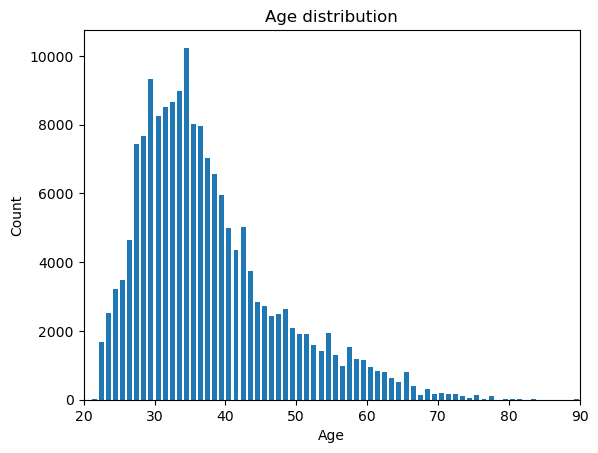

In [14]:
bins = bins(df, 'age', 1)
plt.hist(data = df, x= 'age', bins = bins, rwidth = 0.7);
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.xlim((20, 90));

## Duration Distribution

Duration contains a a very large range of values, Plotted on the logarithmic scale we can see a Unimodal histogram with a normal distribution including a peak between 400 and 800.

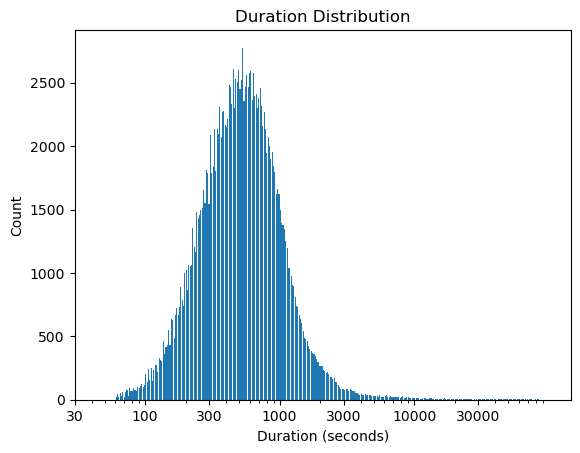

In [3]:
bins = 10 ** np.arange(1.7, 5 + 0.01 , 0.01)
ticks = [30, 100, 300, 1000, 3000, 10000, 30000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_sec',bins = bins, rwidth = 0.8)
plt.xscale('log')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.xticks(ticks, labels)
plt.title('Duration Distribution');

## Duration VS Age decades

Usually elderly are known as less active people due to their health, but in this dataset starting from 40s and above we notice an increase in the duration rate followed by a drastical decrease at 70s.

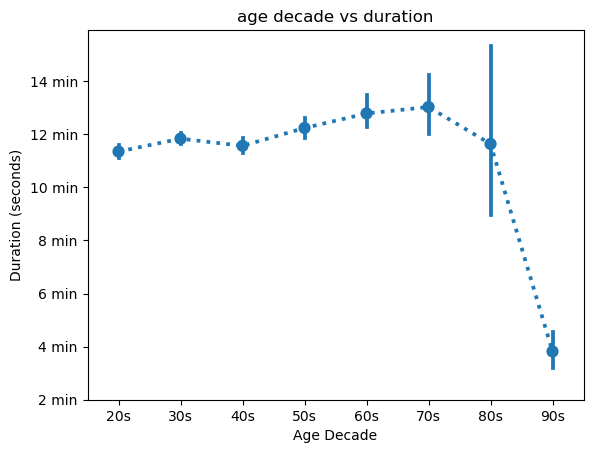

In [17]:
sb.pointplot(data = df, x = 'age_decade', y = 'duration_sec', linestyles = 'dotted');
plt.title('age decade vs duration')
ticks = [120, 240, 360, 480, 600, 720, 840]
labels = ['2 min', '4 min', '6 min', '8 min', '10 min', '12 min', '14 min']
plt.xlabel('Age Decade')
plt.ylabel('Duration (seconds)')
plt.yticks(ticks, labels);

## Gender Proportion

Using a pie chart male's overall duration represents more than 70% comparing to the rest.

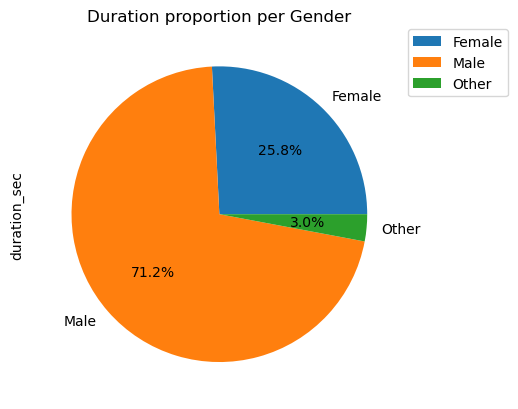

In [18]:
df.groupby(['member_gender']).sum().plot(kind='pie', y='duration_sec', autopct='%1.1f%%')
plt.title('Duration proportion per Gender')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0) #Repositioning the legend

## User type Proportion

The dataset contains two user type customers and subscribers, As shown below subscribers represents more than 90% of participant, They usually take part of trip with less duration comparing to customers.

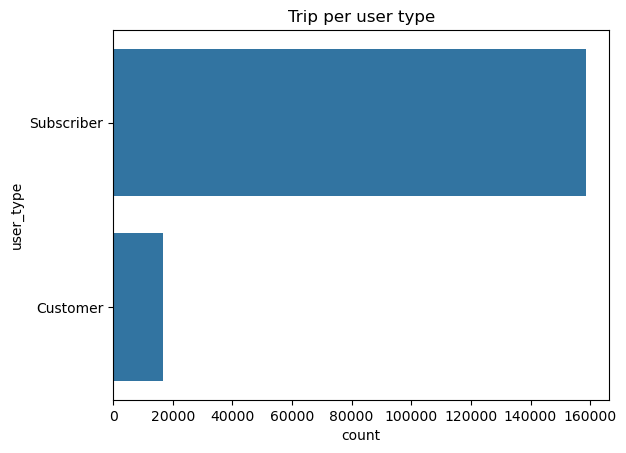

In [23]:
sb.countplot(data = df , y = 'user_type', color = base_color, order = df.user_type.value_counts().index)
plt.title('Trip per user type');

In [1]:
!jupyter nbconvert Slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Slide_deck.ipynb to slides
[NbConvertApp] Writing 710006 bytes to Slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\user\.conda\envs\tea_facts\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\user\.conda\envs\tea_facts\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\.conda\envs\tea_facts\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\user\.conda\envs\tea_facts\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\user\.conda\envs\tea_facts\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(not

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 